<a href="https://colab.research.google.com/github/dembor5317/NBDIA/blob/main/%EC%97%94%EB%B9%84%EB%94%94%EC%95%84_%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ultralytics YOLOv8 설치
!pip install ultralytics

# 필요한 라이브러리 임포트
from ultralytics import YOLO
import cv2
from google.colab import files
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.3/977.3 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
# 이미지 업로드
uploaded = files.upload()

# 업로드한 이미지 파일 이름 확인 (예: 'wedding.jpg')
image_path = list(uploaded.keys())[0]

Saving 1.jpg to 1 (1).jpg


In [ ]:
# YOLOv8 모델 로드
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 74.5MB/s]



image 1/1 /content/1 (1).jpg: 512x640 12 persons, 3 ties, 182.6ms
Speed: 4.4ms preprocess, 182.6ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)


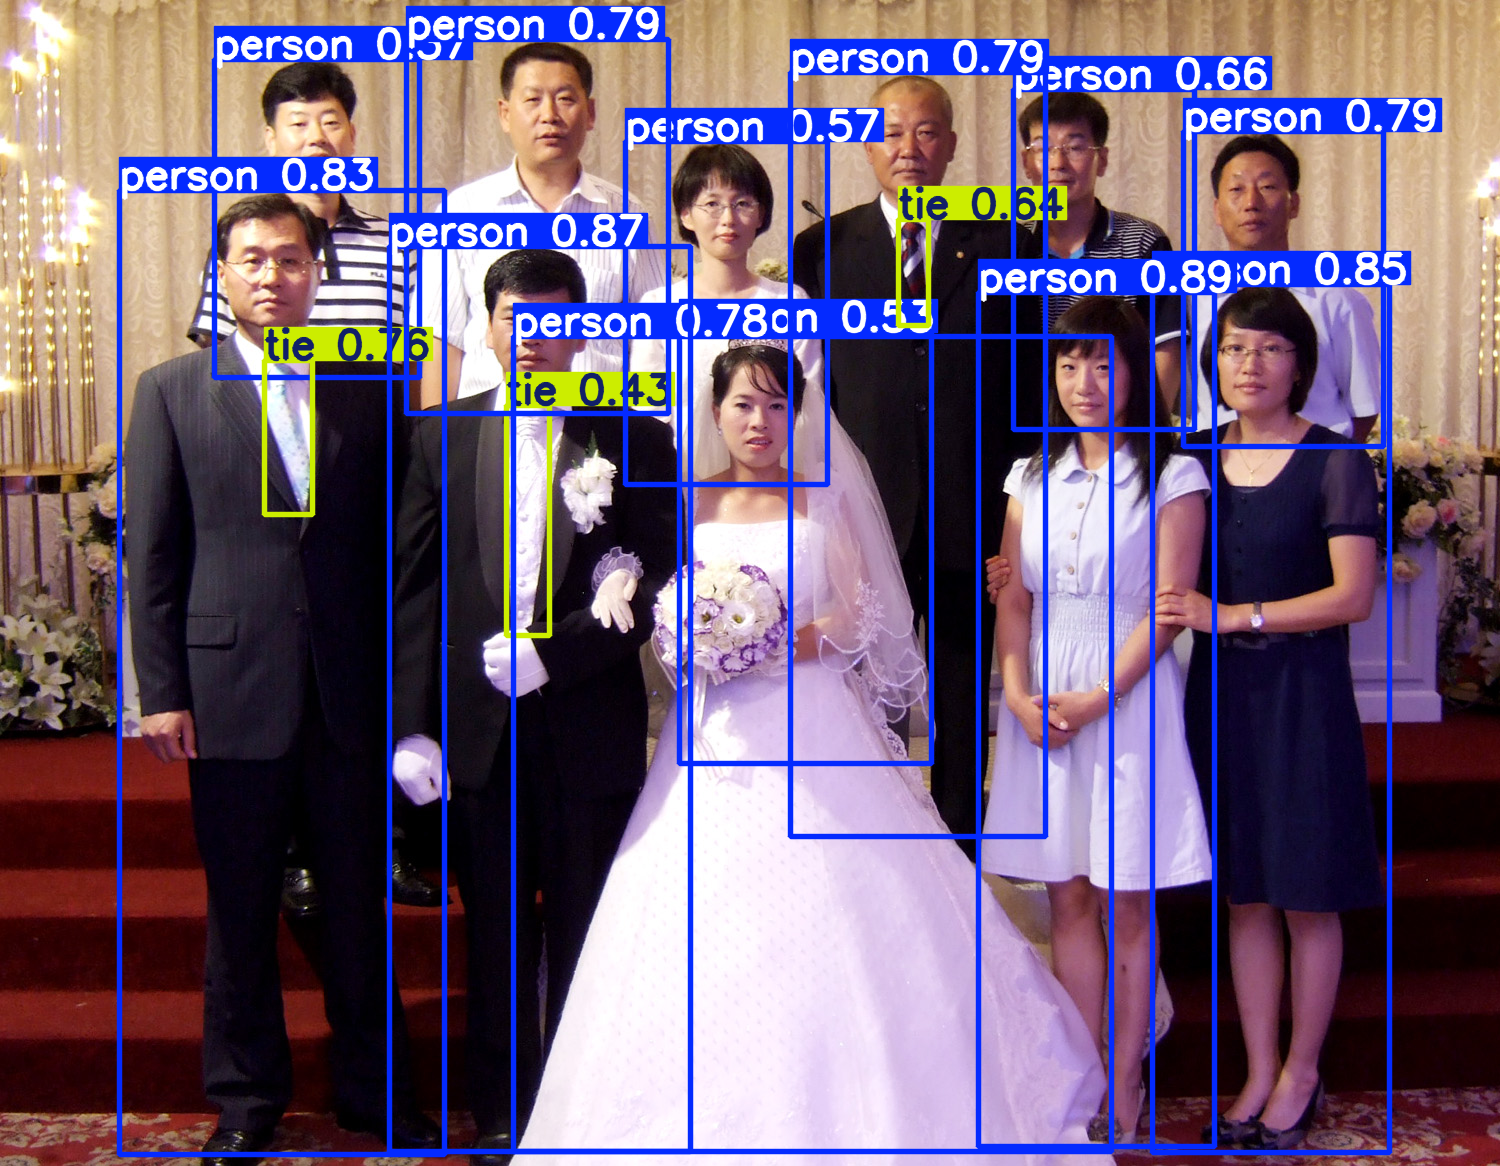

In [ ]:
# 이미지에서 객체 탐지
results = model(image_path)

# 결과 확인
# Access the first element of the results list, which is the Results object
results[0].show()  # Colab에서 결과를 바로 볼 수 있음

In [ ]:
# 탐지된 결과 이미지 저장
results.save()  # 결과 이미지가 'runs/detect/exp' 폴더에 저장됨

# Matplotlib으로 결과 이미지 표시
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR에서 RGB로 변환
plt.imshow(img)
plt.axis('off')
plt.show()

AttributeError: 'list' object has no attribute 'save'

In [ ]:
# 탐지된 객체 정보 확인
for result in results:
    boxes = result.boxes  # 바운딩 박스 정보
    for box in boxes:
        cls = int(box.cls)  # 클래스 ID
        label = model.names[cls]  # 클래스 이름 (예: 'person')
        if label == 'person':
            print(f"Person detected at coordinates: {box.xyxy}")

# 사람 수 카운트
person_count = sum(1 for box in results[0].boxes if model.names[int(box.cls)] == 'person')
print(f"Total number of people detected: {person_count}")